<div style="display: flex; align-items: flex-start;">
    <a href='https://en.wikipedia.org/wiki/List_of_countries_by_number_of_military_and_paramilitary_personnel' target='_blank'>
        <img src="https://c4.wallpaperflare.com/wallpaper/788/1011/710/war-and-army-handgun-wallpaper-preview.jpg" alt="Classic House" style="border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);" width="600" height="500">
    </a>
    <div style="margin-left: 20px;">
        <p style="color: #B22222; font-size: 16px;"><strong>Project Objective:</strong>The objective of this project is to analyze and cluster countries based on their military power using various features such as defense budget, number of active personnel, equipment, and technological advancements. The goal is to identify patterns and group countries into clusters that share similar military capabilities, providing insights into global military dynamics.</p>

Exploratory Data Analysis (EDA): Conducted a thorough examination of the dataset, focusing on identifying and handling missing values, exploring distributions, and analyzing correlations among key military indicators.

Data Cleaning: Addressed missing values through appropriate imputation methods or removal. Special attention was given to critical variables such as defense budget and active personnel counts to ensure data integrity.

Feature Engineering: Created new features that could potentially enhance the clustering process, such as calculating per capita defense spending, the ratio of active personnel to population, and aggregating equipment types into broader categories.

Feature Selection: Identified the most significant features that influence the clustering process, reducing dimensionality while retaining the most informative variables to improve the clustering model's effectiveness.

Modeling: Employed various clustering algorithms, including K-Means, Agglomerative Clustering, and DBSCAN, to group countries based on their military power. Each model was evaluated to determine the most appropriate approach for the dataset.

Model Evaluation: Evaluated the clustering models using metrics such as silhouette score, Davies-Bouldin index, and inertia to select the best-performing clustering model. Visualizations such as dendrograms and cluster plots were used to assess the quality of clusters.

Hyperparameter Optimization: Enhanced the clustering performance by fine-tuning parameters like the number of clusters, distance metrics, and linkage methods through Grid Search and Random Search.

Hyperparameter Optimization: Improved model performance through techniques like Grid Search and Random Search to optimize hyperparameters.
<p style="color: green; text-align: center; margin-top: 20px;">
    Click on the image to access the more information.
</p>


<p style="text-align: center;"><em>Import Libraries</em></p>

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

<p style="text-align: center;"><em>Read Data</em></p>

In [2]:
df=pd.read_excel("World military power.xlsx")

<p style="text-align: center;"><em>Exploratory Data Analysis</em></p>

In [3]:
df.head(10)

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Land Strength,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Navy Strength,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Finances,Unnamed: 37,Unnamed: 38,Unnamed: 39,Logistics,Unnamed: 41,Natural resources,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Manpower,Unnamed: 49,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987
2,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,Albania,0,Albania,19,Albania,0,Albania,0,Albania,467,Albania,0,Albania,0,Albania,0,Albania,38,Albania,0,Albania,0,Albania,0,Albania,0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4,Albania,16000,Albania,42500,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691
3,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,87,Algeria,257,Algeria,45,Algeria,880,Algeria,7361,Algeria,320,Algeria,240,Algeria,316,Algeria,201,Algeria,0,Algeria,6,Algeria,0,Algeria,5,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734
4,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,Angola,47,Angola,126,Angola,15,Angola,379,Angola,595,Angola,28,Angola,357,Angola,115,Angola,57,Angola,0,Angola,0,Angola,0,Angola,0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176,Angola,"16,66,000",Angola,82300,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,A

In [4]:
df.columns=df.iloc[0]
df=df[1:].reset_index(drop=True)

In [5]:
df.sample(10)

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
53,Ireland,1.9481,Ireland,19,Ireland,0,Ireland,0,Ireland,0,Ireland,8,Ireland,8,Ireland,0,Ireland,0,Ireland,124,Ireland,0,Ireland,0,Ireland,0,Ireland,8,Ireland,0,Ireland,0,Ireland,0,Ireland,0,Ireland,"87,00,00,000",Ireland,"24,70,00,00,00,000",Ireland,40,Ireland,0,Ireland,"1,45,000",Ireland,0,Ireland,"23,66,779",Ireland,"50,68,050",Ireland,70273,Ireland,1448,Ireland,956,Ireland,443
9,Bahrain,1.8547,Bahrain,109,Bahrain,17,Bahrain,0,Bahrain,2,Bahrain,37,Bahrain,65,Bahrain,22,Bahrain,180,Bahrain,843,Bahrain,33,Bahrain,26,Bahrain,17,Bahrain,39,Bahrain,0,Bahrain,0,Bahrain,0,Bahrain,1,Bahrain,"1,41,50,00,000",Bahrain,"52,15,00,00,000",Bahrain,4,Bahrain,45000,Bahrain,55000,Bahrain,"12,46,00,000",Bahrain,"8,06,505",Bahrain,"14,22,659",Bahrain,760,Bahrain,161,Bahrain,0,NaN,NaN
92,Panama,3.6537,Panama,39,Panama,0,Panama,0,Panama,11,Panama,4,Panama,23,Panama,0,Panama,0,Panama,65,Panama,0,Panama,0,Panama,0,Panama,20,Panama,0,Panama,0,Panama,0,Panama,0,Panama,"50,00,00,000",Panama,"91,53,00,00,000",Panama,117,Panama,0,Panama,"1,00,000",Panama,0,Panama,"17,59,698",Panama,"38,00,644",Panama,75420,Panama,2490,Panama,800,Panama,687
57,Japan,0.1501,Japan,1561,Japan,279,Japan,12,Japan,60,Japan,427,Japan,637,Japan,119,Japan,1004,Japan,3130,Japan,238,Japan,500,Japan,99,Japan,155,Japan,4,Japan,20,Japan,40,Japan,0,Japan,"49,00,00,00,000",Japan,"32,40,00,00,00,000",Japan,175,Japan,3841,Japan,"40,00,000",Japan,"4,41,20,000",Japan,"5,38,73,803",Japan,"12,61,68,156",Japan,"3,77,915",Japan,29751,Japan,1770,NaN,NaN
126,Uganda,1.6176,Uganda,48,Uganda,10,Uganda,0,Uganda,2,Uganda,10,Uganda,26,Uganda,5,Uganda,371,Uganda,1081,Uganda,6,Uganda,53,Uganda,26,Uganda,8,Uganda,0,Uganda,0,Uganda,0,Uganda,0,Uganda,"93,50,00,000",Uganda,"10,80,00,00,000",Uganda,47,Uganda,0,Uganda,17500,Uganda,"2,50,00,00,000",Uganda,"1,47,07,350",Uganda,"4,08,53,749",Uganda,"2,41,038",NaN,NaN,Uganda,0,Uganda,2729
55,Italy,0.2111,Italy,860,Italy,99,Italy,110,Italy,38,Italy,185,Italy,439,Italy,59,Italy,200,Italy,6947,Italy,54,Italy,108,Italy,21,Italy,249,Italy,2,Italy,8,Italy,4,Italy,12,Italy,"27,80,00,00,000",Italy,"24,44,00,00,00,000",Italy,129,Italy,77530,Italy,"13,00,000",Italy,"55,67,00,000",Italy,"2,80,11,003",Italy,"6,22,46,674",Italy,"3,01,340",Italy,7600,Italy,2400,Italy,1836
3,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,Angola,47,Angola,126,Angola,15,Angola,379,Angola,595,Angola,28,Angola,357,Angola,115,Angola,57,Angola,0,Angola,0,Angola,0,Angola,0

<p style="text-align: center;"><em>Feature Engineering
</em></p>

In [6]:
df["Country Name"]=df["Military Strength"]
cols=df.columns.tolist()
cols=[cols[-1]]+cols[:-1]
df=df[cols]

In [7]:
df.isnull().sum()[lambda x: x > 0]

0
Navy Fleet Strengths                     14
Navy Fleet Strengths value               14
Aircraft Carrier Fleet Strength          23
Aircraft Carrier Fleet Strength value    23
Submarine Fleet Strength                 23
Submarine Fleet Strength value           23
Destroyer Fleet Strength                 23
Destroyer Fleet Strength value           23
Frigate Fleet Strength                   23
Frigate Fleet Strength value             23
Total Coastline Coverage                 29
Total Coastline Coverage value           29
Total Border Coverage                     9
Total Border Coverage value               9
dtype: int64

In [8]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
0,,
Total Coastline Coverage value,29,0.210145
Total Coastline Coverage,29,0.210145
Aircraft Carrier Fleet Strength value,23,0.166667
Frigate Fleet Strength value,23,0.166667
Frigate Fleet Strength,23,0.166667
Destroyer Fleet Strength value,23,0.166667
Destroyer Fleet Strength,23,0.166667
Submarine Fleet Strength value,23,0.166667
Submarine Fleet Strength,23,0.166667


In [9]:
df[df.duplicated()]

,Country Name,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 61 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Country Name                             138 non-null    object
 1   Military Strength                        138 non-null    object
 2   Military Strength Power Index            138 non-null    object
 3   Aircraft Strength                        138 non-null    object
 4   Aircraft Strength value                  138 non-null    object
 5   Fighter/Interceptor Strength             138 non-null    object
 6   Fighter/Interceptor Strength value       138 non-null    object
 7   Attack Aircraft Strength                 138 non-null    object
 8   Attack Aircraft Strength value           138 non-null    object
 9   Transport Aircraft Fleet Strength        138 non-null    object
 10  Transport Aircraft Fleet Strength value  138 non-null    objec

In [11]:
df.describe()

,Country Name,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
count,138,138,138.0000,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,124,124,115,115,115,115,115,115,115,115,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,109,109,138,138,129,129
unique,138,138,138.0000,138,113,138,63,138,38,138,49,138,77,138,97,138,45,138,106,138,130,138,70,138,91,138,68,124,78,115,5,115,20,115,11,115,18,138,124,138,138,138,108,138,88,138,102,138,84,138,138,138,138,138,138,109,104,138,92,129,125
top,Afghanistan,Afghanistan,1.3444,Afghanistan,19,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,5,Afghanistan,0,Afghanistan,0,Afghanistan,2000,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,"2,50,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,18,Afghanistan,0,Afghanistan,18500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,853,Afghanistan,0,Afghanistan,443
freq,1,1,1.0000,1,5,1,46,1,75,1,15,1,25,1,4,1,63,1,24,1,4,1,52,1,24,1,46,1,14,1,102,1,74,1,103,1,61,1,3,1,1,1,3,1,46,1,4,1,46,1,1,1,1,1,1,1,2,1,38,1,2


In [12]:
df.shape

(138, 61)

In [13]:
df=df.astype(str)

In [14]:
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).apply(lambda x: x.str.replace(',', ''))

In [15]:
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce').astype(int)
    except ValueError:
        continue

In [16]:
df=df.astype("category")

In [17]:
df=df.replace('nan',np.nan)

In [18]:
newdf=['Country Name','Military Strength Power Index']+[col for col in df.columns if 'value' in col]
df = df[newdf]

In [19]:
empty_col =df.columns[df.isnull().any()]
df[empty_col] = df[empty_col].astype(float)
df[empty_col] = df[empty_col].fillna(df[empty_col].mean())

<p style="text-align: center;"><em>Data Visualition
</em></p>


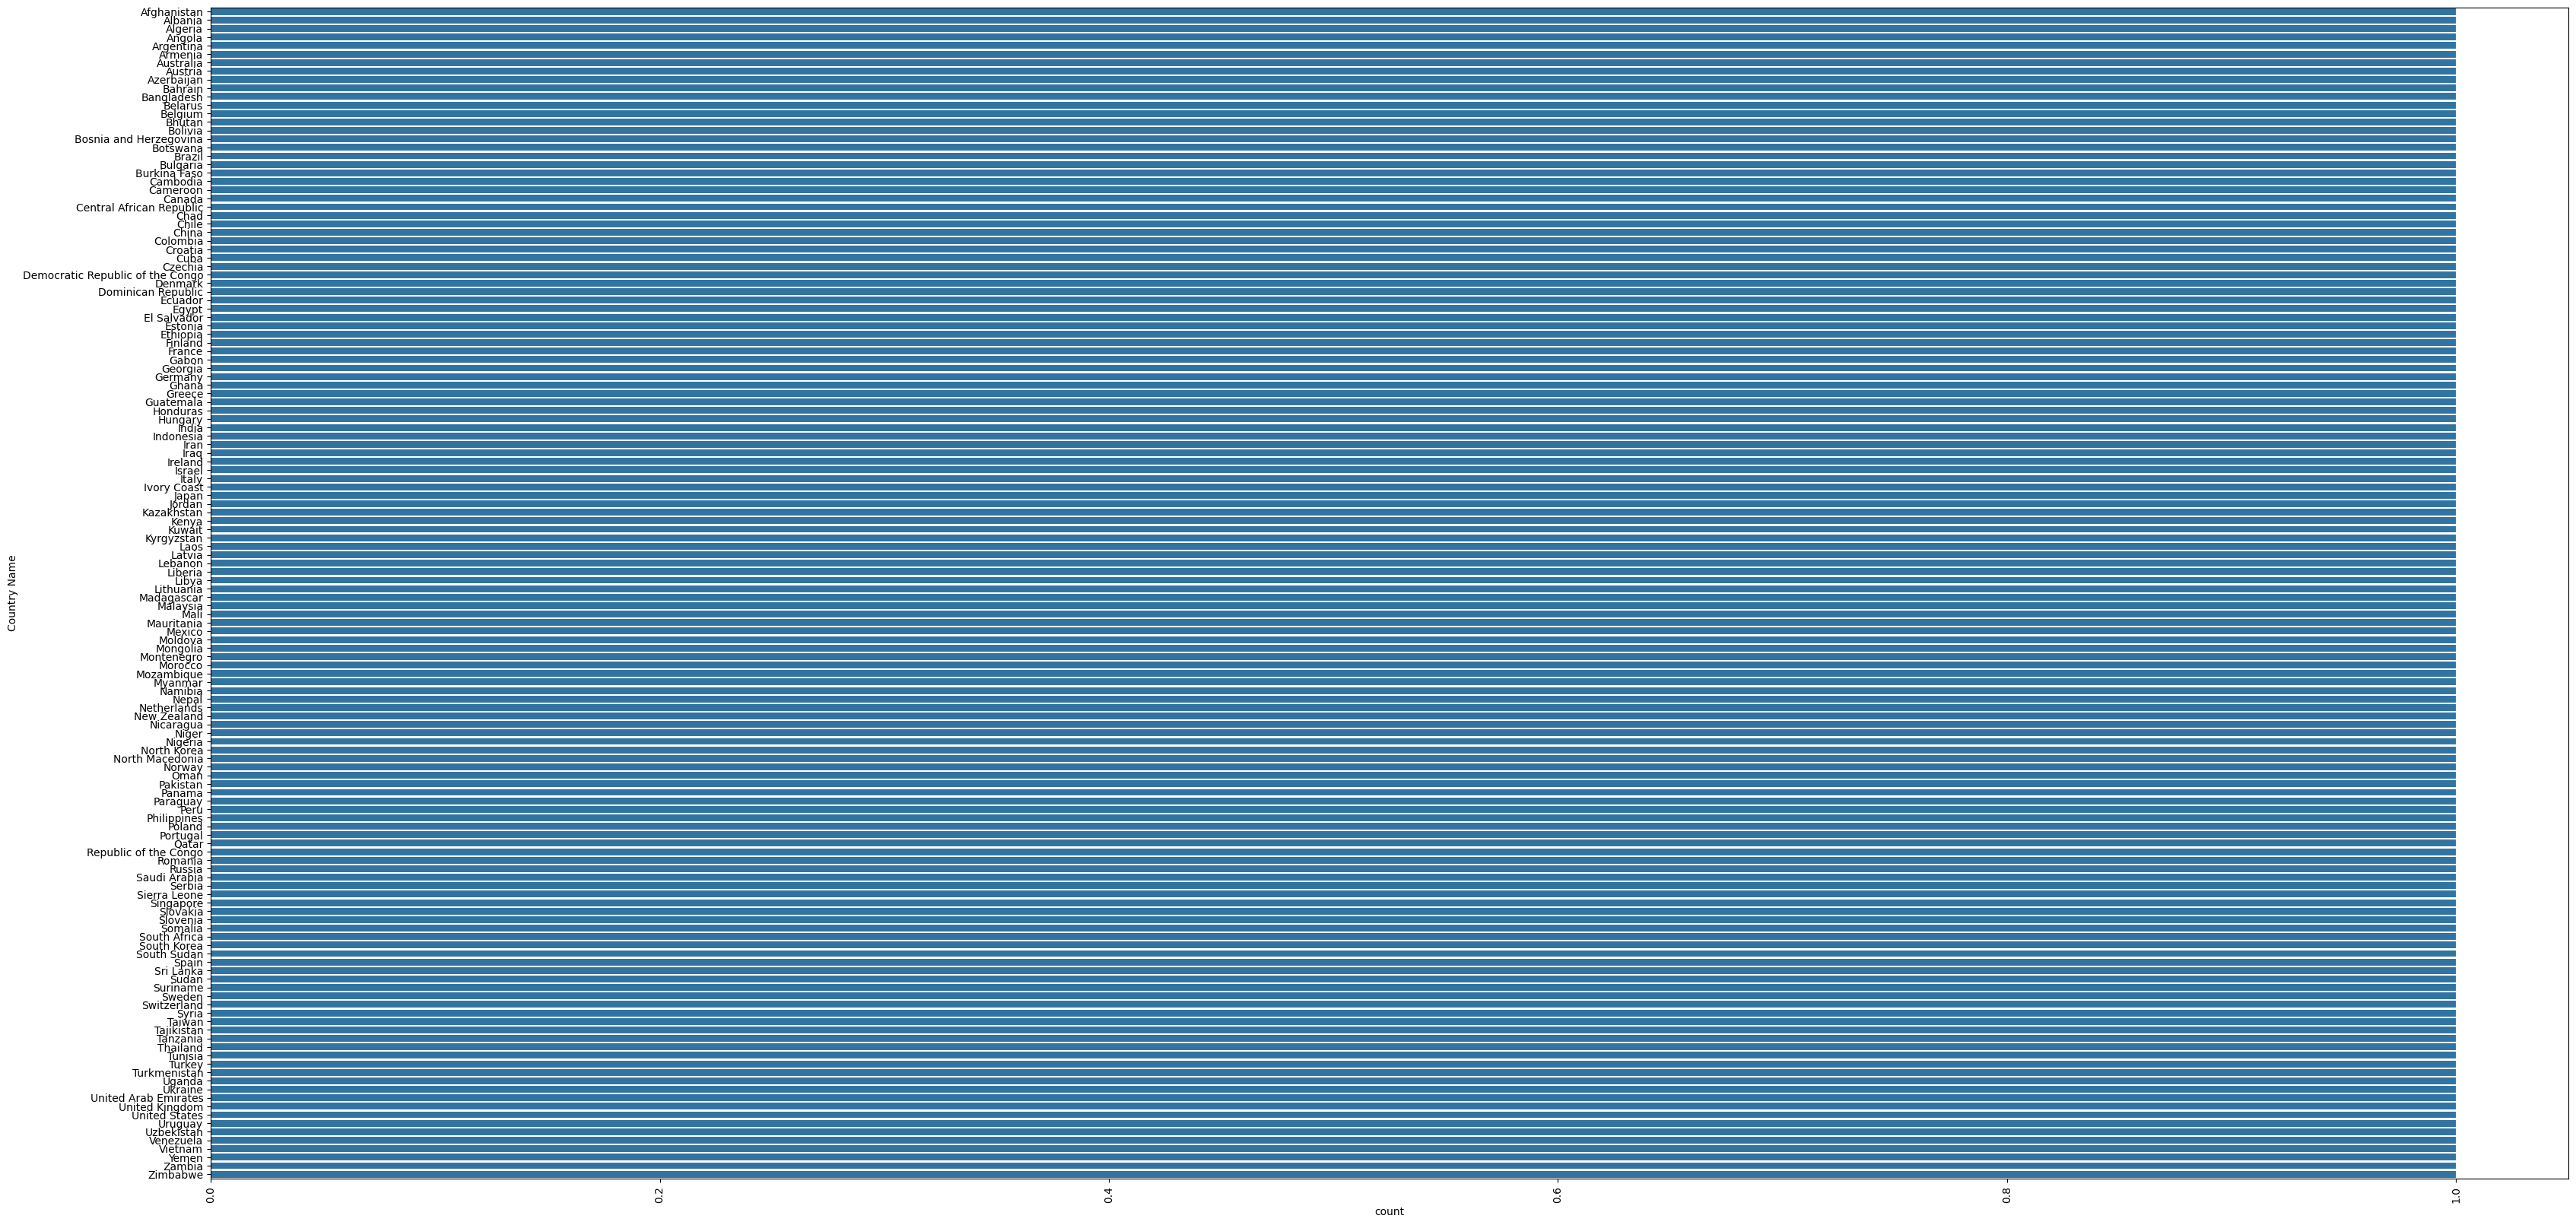

In [20]:
plt.figure(figsize=(40,20))
sns.countplot(df['Country Name'])
plt.xticks(rotation=90);

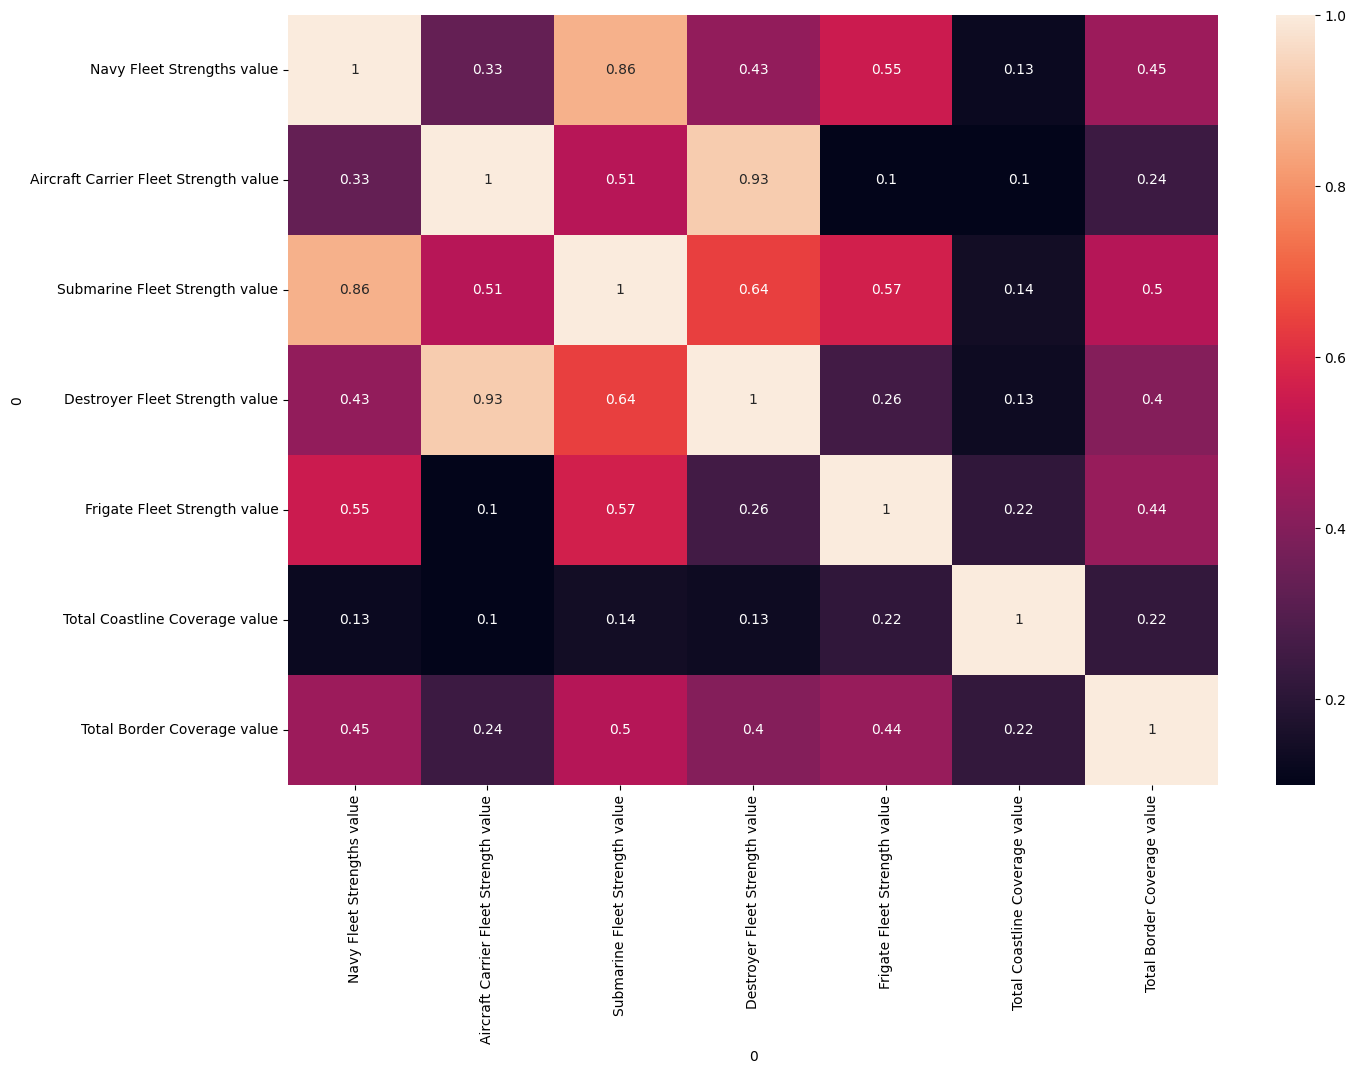

In [21]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True);

<p style="text-align: center;"><em>Modelling
</em></p>


In [24]:
x=df.drop("Country Name",axis=1)

In [25]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, Birch, SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

def clust(x, clusters):
    allscore = []
    allclusters = []
    sum_of_squared_distances = []
    
    for no_of_cluster in range(2, clusters + 1):  
        model = KMeans(n_clusters=no_of_cluster, random_state=42)
        pred = model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score = silhouette_score(x, pred)
        print(f"Number of cluster {no_of_cluster}, silhouette {score}")
        allscore.append(score)
        allclusters.append(no_of_cluster)
    
    optimal_clusters = allclusters[np.argmax(allscore)]
    print(f"Optimal cluster count is {optimal_clusters}")
    
    return optimal_clusters, allscore, sum_of_squared_distances

def clustering_models_comparison(x, optimal_clusters):
    models = [
        ('KMeans', KMeans(n_clusters=optimal_clusters, random_state=42)),
        ('Agglomerative', AgglomerativeClustering(n_clusters=optimal_clusters)),
        ('DBSCAN', DBSCAN(eps=0.5, min_samples=5)),
        ('MeanShift', MeanShift()),
        ('Birch', Birch(n_clusters=optimal_clusters)),
        ('SpectralClustering', SpectralClustering(n_clusters=optimal_clusters, random_state=42))
    ]

    results = []
    for name, model in models:
        try:
            labels = model.fit_predict(x)
            silhouette = silhouette_score(x, labels)
            davies_bouldin = davies_bouldin_score(x, labels)
            results.append([name, silhouette, davies_bouldin])
        except ValueError as ve:
            results.append([name, 'Error', str(ve)])
        except Exception as e:
            results.append([name, 'Error', str(e)])

    results_df = pd.DataFrame(results, columns=['Model', 'Silhouette Score', 'Davies Bouldin Score'])
    return results_df

optimal_clusters, allscore, sum_of_squared_distances = clust(x, 9)
results = clustering_models_comparison(x, optimal_clusters)

print("Clustering Modelleri Karşılaştırması:")
print(results.to_string(index=False))


Number of cluster 2, silhouette 0.9493996936226436
Number of cluster 3, silhouette 0.899544295036163
Number of cluster 4, silhouette 0.8671436271439986
Number of cluster 5, silhouette 0.867519554074611
Number of cluster 6, silhouette 0.8340611695163462
Number of cluster 7, silhouette 0.8381061965851069
Number of cluster 8, silhouette 0.6873607457764257
Number of cluster 9, silhouette 0.6905241769259
Optimal cluster count is 2
Clustering Modelleri Karşılaştırması:
             Model Silhouette Score                                                   Davies Bouldin Score
            KMeans           0.9494                                                               0.031737
     Agglomerative           0.9494                                                               0.031737
            DBSCAN            Error Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
         MeanShift         0.833981                                                               0.2096